### Markowitz Efficient Frontier

Create the Markowitz Efficient Frontier for 3 stocks - Procter & Gamble('PG'), Microsoft('MSFT') & British Petroleum (‘BP’) from the 1st of January 2018 until 24th March 2023. 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

from iexfinance.stocks import Stock, get_historical_data

api_key = 'API_KEY'

In [2]:
start = datetime(2018, 1, 1)
end = datetime(2023, 3, 24)

In [3]:
assets = ['PG', 'MSFT', 'BP']
pf_data = pd.DataFrame()
for t in assets:
    pf_data[t] = get_historical_data(t, start, end, output_format = 'pandas', token=api_key)['close']

In [4]:
pf_data = pf_data.astype('float64')

Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe. 

In [5]:
pf_data.tail()

,PG,MSFT,BP
2023-03-20,145.13,272.23,35.80
2023-03-21,144.08,273.78,37.02
2023-03-22,143.99,272.29,36.82
2023-03-23,143.79,277.66,36.48
2023-03-24,146.72,280.57,35.88


<AxesSubplot:>

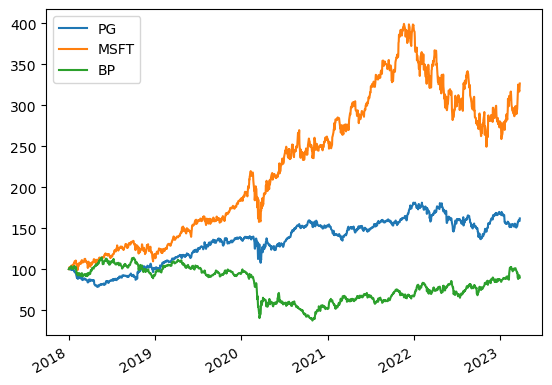

In [6]:
(pf_data/pf_data.iloc[0]*100).plot()

Calculate their logarithmic returns.

In [7]:
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns

,PG,MSFT,BP
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.001214,0.004643,0.011496
2018-01-04,0.007044,0.008763,0.003959
2018-01-05,0.000658,0.012322,0.001393
2018-01-08,0.005247,0.001020,-0.000465
...,...,...,...
2023-03-20,0.015275,-0.026105,0.017754
2023-03-21,-0.007261,0.005678,0.033510
2023-03-22,-0.000625,-0.005457,-0.005417
2023-03-23,-0.001390,0.019530,-0.009277


In [8]:
log_returns.mean()*250

PG      0.091544
MSFT    0.224916
BP     -0.020538
dtype: float64

In [9]:
log_returns.cov()*250

,PG,MSFT,BP
PG,0.046904,0.031445,0.016763
MSFT,0.031445,0.095800,0.038037
BP,0.016763,0.038037,0.137476


In [10]:
log_returns.corr()

,PG,MSFT,BP
PG,1.000000,0.469105,0.208755
MSFT,0.469105,1.000000,0.331442
BP,0.208755,0.331442,1.000000


Create a variable that carries the number of assets in your portfolio.

In [11]:
num_assets = len(assets)
num_assets

3

In [12]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)

weights

array([0.1415325 , 0.00996354, 0.84850396])

In [21]:
weights[0]+weights[1]+weights[2]

0.9999999999999999

Now, estimate the expected Portfolio Return, Variance, and Volatility.

### Expected Portfolio Returns

In [14]:
np.sum(weights*log_returns.mean())*250

-0.0022290913501922644

### Expected Portfolio Variance

In [15]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.10468383064231768

Expected Portfolio Variance

In [16]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.32354880720274287

____________________________________________________________________________

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [17]:
portfolio_returns = []
portfolo_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolo_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

portfolio_returns, portfolo_volatilities

([0.10574688730983403,
  0.09112376244031652,
  0.10830038285681912,
  0.13868397100186627,
  0.0246874595798523,
  0.09501346537963691,
  0.09795177818570185,
  0.11973780889615211,
  0.1617631497535388,
  0.033803958856343394,
  0.029450343400093445,
  0.12449572867951399,
  0.11542627164716786,
  0.0708972562885103,
  0.10581880906651524,
  0.09084069597599984,
  0.17090919391631135,
  0.09432210945349538,
  0.09590185314860476,
  0.024545573212289645,
  0.05587863553385795,
  0.1229307903226661,
  0.09709065367831575,
  0.06476801316390418,
  0.1964463894554711,
  0.04305457071314793,
  0.11903322784834522,
  0.08781946183989375,
  0.03953172792552877,
  0.16454234760108688,
  0.15492593328903886,
  0.21204501812595938,
  0.10709506880502982,
  0.15198149947890735,
  0.07215885607731477,
  0.12806958641631666,
  0.04500927903968778,
  0.13018491837907553,
  0.17208733159384348,
  0.0880557880539443,
  0.16310923050979795,
  0.10362819684199802,
  0.05503454326389089,
  0.1055515655

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [18]:
portfolio_returns = np.array(portfolio_returns)
portfolo_volatilities = np.array(portfolo_volatilities)

portfolio_returns, portfolo_volatilities

(array([ 0.10574689,  0.09112376,  0.10830038,  0.13868397,  0.02468746,
         0.09501347,  0.09795178,  0.11973781,  0.16176315,  0.03380396,
         0.02945034,  0.12449573,  0.11542627,  0.07089726,  0.10581881,
         0.0908407 ,  0.17090919,  0.09432211,  0.09590185,  0.02454557,
         0.05587864,  0.12293079,  0.09709065,  0.06476801,  0.19644639,
         0.04305457,  0.11903323,  0.08781946,  0.03953173,  0.16454235,
         0.15492593,  0.21204502,  0.10709507,  0.1519815 ,  0.07215886,
         0.12806959,  0.04500928,  0.13018492,  0.17208733,  0.08805579,
         0.16310923,  0.1036282 ,  0.05503454,  0.10555157,  0.07064577,
         0.13785666,  0.04695407,  0.10627995,  0.13676913,  0.14797081,
         0.14427479,  0.10200457,  0.08775963,  0.09965982,  0.16000133,
         0.04723858,  0.12342619,  0.08748796,  0.15373026,  0.10915457,
         0.08223449,  0.18119739,  0.10217115,  0.09028016,  0.09957626,
         0.15885517,  0.05525745,  0.03345366,  0.0

4) Create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [19]:
portfolio = pd.DataFrame({'Return':portfolio_returns, 'Volitality':portfolo_volatilities})
portfolio

,Return,Volitality
0,0.105747,0.204422
1,0.091124,0.200813
2,0.108300,0.229927
3,0.138684,0.230613
4,0.024687,0.279523
...,...,...
995,0.094237,0.206531
996,0.094727,0.210507
997,0.121327,0.218897
998,0.060529,0.284200


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

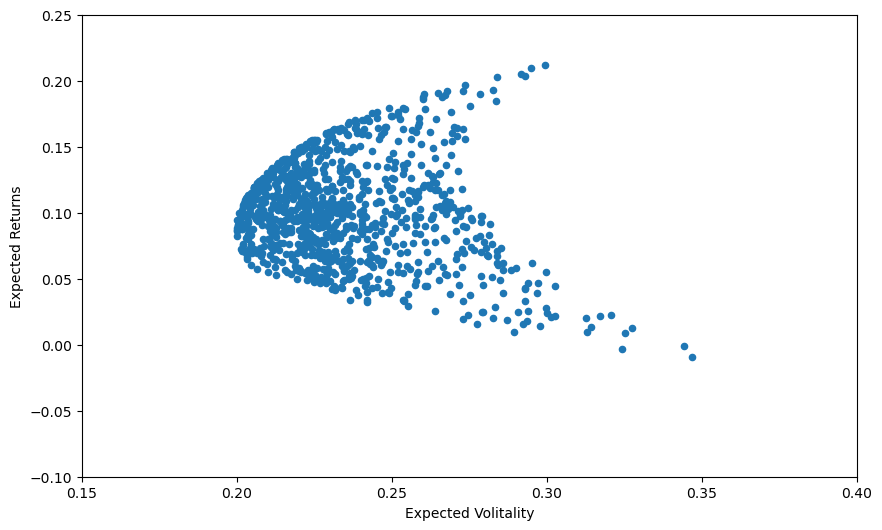

In [23]:
portfolio.plot(x='Volitality', y='Return', kind='scatter', figsize=(10,6))
plt.axis([0.15, 0.40, -0.1, 0.25])
plt.xlabel('Expected Volitality')
plt.ylabel('Expected Returns')
plt.show()

---